# prinPy Quickstart Guide

prinPy has global and local algorithms. 

## 1. Local Algorithms

In [75]:
from prinpy.local import CLPCG

# Some other modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import timeit

### Generate Test Data

In [2]:
theta = np.linspace(0,np.pi*3, 1000)
r = np.linspace(0,1,1000) ** .5

x_data = r * np.cos(theta) + np.random.normal(scale = .02, size = 1000)
y_data = r * np.sin(theta) + np.random.normal(scale = .02, size = 1000)

### Plot

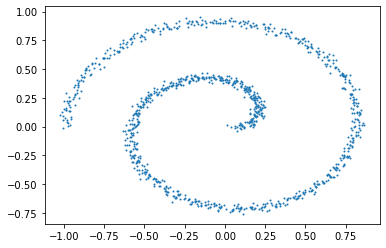

In [3]:
plt.scatter(x_data, y_data, s = 1)
plt.show()

### Fit Principal Curve with Local Algorithms

In [4]:
cl = CLPCG()  # Create CLPCG object

# the fit() method calculates the principal curve
# e_max is determined through trial and error as of
# now, but aim for about 1/2 data error and adjust from
# there. 
start = timeit.default_timer()

cl.fit(x_data, y_data, e_max = .03)  # CLPCG.fit() to fit PC

stop = timeit.default_timer()

print("Took %f seconds" % (stop - start))

Took 0.214514 seconds


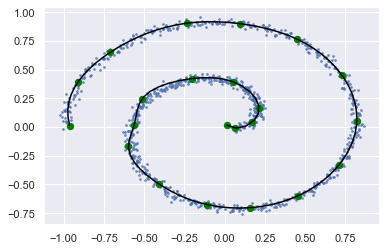

In [76]:
fig, ax = plt.subplots()
ax.scatter(x_data, y_data, s = 3, alpha = .7)
cl.plot(ax)     # .plot will display the fit curve.
                # you can optionally pass in a matplotlib ax
pts = cl.fit_points   # fitted points with PC that spline is passed through
ax.scatter(pts[:,0], pts[:,1], s = 40, c = 'green')

In [6]:
# .proj will return a projection index for each point
proj = cl.project(x_data, y_data) 
print(proj[:5])

In [10]:
# additionally, you can get spline ticks or fit points:
tck = cl.spline_ticks
fit_pts = cl.fit_points

print(tck[0])
print(fit_pts[:5])

[0.         0.         0.         0.         0.02700805 0.04754636
 0.09041594 0.12945787 0.18449046 0.22115265 0.2495283  0.30794099
 0.36219516 0.4034585  0.45169821 0.50868772 0.57010873 0.63433081
 0.69801242 0.75620144 0.80715538 0.89094181 1.         1.
 1.         1.        ]
[[ 0.01447173  0.01714681]
 [ 0.06537318 -0.00911538]
 [ 0.17175084  0.04210127]
 [ 0.21407512  0.16854487]
 [ 0.05238058  0.39507542]]


## 2. Global

In [13]:
# NLPCA is the global alg
from prinpy.glob import NLPCA

In [54]:
# Generate some test data
t = np.linspace(0, 1, 1000) + np.random.normal(scale = .1, size = 1000)
x = 5*np.cos(t) + np.random.normal(scale = .1, size = 1000)
y = np.sin(t) + np.random.normal(scale = .1, size = 1000)

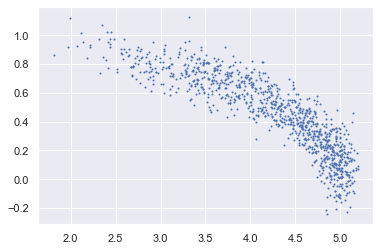

In [77]:
plt.scatter(x, y, s = 1)

In [65]:
# create solver
pca = NLPCA()

# transform data for better training with the 
# neural net using built in preprocessor
data_new = pca.preprocess( [x,y] )

# fit the data
pca.fit(data_new, epochs = 150, nodes = 15, lr = .01, verbose = 0)

# project the current data. This returns a projection
# index for each point and points to plot the curve
proj, curve_pts = pca.project(data_new)

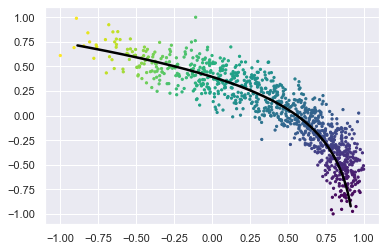

In [81]:
plt.scatter(data_new[:,0], 
            data_new[:,1], 
            s = 5, 
            c = proj.reshape(-1), 
            cmap = 'viridis')
plt.plot(curve_pts[:,0], 
         curve_pts[:,1], 
         color = 'black',
         linewidth = '2.5')